In [43]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [44]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_matrix import ClothingSimilarity
from src.pipeline.modules.cloth_categories import ClothingCategories


from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [45]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [52]:
relative_path = get_training_data_path('setup-v2', '0_mixed-stage-1-all')
fullpath = os.path.join(relative_path, 'frame5871_dress.jpg')
print(fullpath)

/home/kohnle/master-projekt/dataset/production/setup-v2/0_mixed-stage-1-all/frame5871_dress.jpg


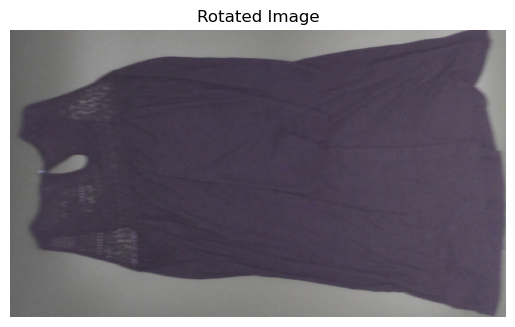

FINAL
{'Pencil Skirt': 0.06389617919921875, 'A-Line Skirt': 0.188873291015625, 'Pleated Skirt': 0.09659576416015625, 'Maxi Skirt': 0.175933837890625, 'Wrap Skirt': 0.1647491455078125, 'A-Line Dress': 0.19512939453125, 'Sheath Dress': 0.026330947875976562, 'Wrap Dress': 0.013912200927734375, 'Maxi Dress': 0.030834197998046875, 'Shift Dress': 0.043689727783203125}
MAX
A-Line Dress


In [53]:
image = cv2.imread(fullpath)

rot_accuracy = []

rot_frame_rgb = image

# Display the rotated image using Matplotlib
plt.imshow(rot_frame_rgb)
plt.title('Rotated Image')
plt.axis('off')  # Hide axis
plt.show()

with_rotation = True

skirts = ["Pencil Skirt", "A-Line Skirt", "Pleated Skirt", "Maxi Skirt", "Wrap Skirt"]
dresses = ["A-Line Dress", "Sheath Dress", "Wrap Dress", "Maxi Dress", "Shift Dress"]

combined = skirts + dresses

res = clip_instance.subpath([], 'dress', 'dress', combined, rot_frame_rgb, True)       
print("FINAL")
print(res)
max_type = max(res, key=res.get)
print("MAX")
print(max_type)

In [15]:

    underwear_matrix = np.array([
        [1.0, 0.7, 0.2],  # Pant
        [0.7, 1.0, 0.7],  # Short
        [0.2, 0.7, 1.0]   # Skirt
    ])

ClothingSimilarity.get_weighted_accuracy(1, clip_instance.classes, res, underwear_matrix)

ValueError: too many values to unpack (expected 2)